# Module 3 Problem Set

<div class="alert alert-block alert-success"><b>Problem 1: </b></div>Graph the following:

$ -x + 2y <= -6 $

$ 5x - 4y >= -20 $

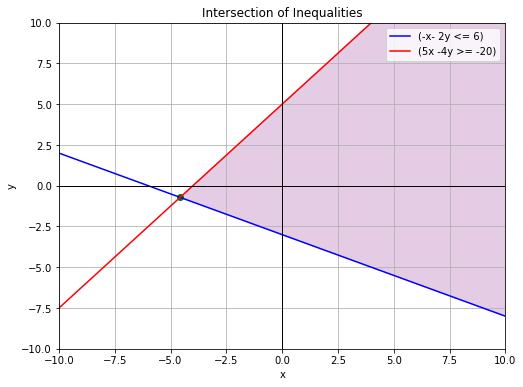

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the inequality parameters
a1, b1, c1 = -1, -2, 6
a2, b2, c2 = 5, -4, -20

# Generate x values
x_vals = np.linspace(-10, 10, 400)

# Calculate corresponding y values for each inequality
y_vals1 = (c1 - a1 * x_vals) / b1
y_vals2 = (c2 - a2 * x_vals) / b2

# Find intersection point of the two lines
A = np.array([[a1, b1], [a2, b2]])
b = np.array([c1, c2])
intersection = np.linalg.solve(A, b)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the two inequalities
plt.plot(x_vals, y_vals1, label='(-x- 2y <= 6)', color='blue')
plt.plot(x_vals, y_vals2, label='(5x -4y >= -20)', color='red')

# Fill the intersection of the inequalities
plt.fill_between(x_vals, y_vals1, y_vals2, where=(y_vals1 <= y_vals2), alpha=0.2, color='purple')

# Set labels, title, and other aesthetics
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intersection of Inequalities')
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.scatter(*intersection, color='green', marker='o') # plot the intersection point

plt.show()

<div class="alert alert-block alert-success"><b>Problem 2: </b></div>

Caitlyn sells cell phone sweaters and keychains at the county fair. She wants to sell at least 16 crafts in total. She sells the cell phone sweaters for `$`3.00 and the keychains for `$`0.50. She needs to sell at least `$`23 worth of crafts in order to earn a profit.

Graph the system.

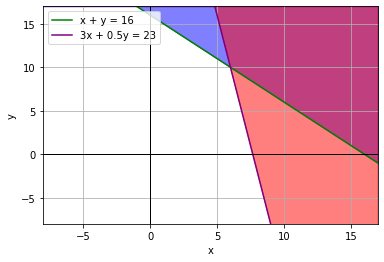

In [2]:
# The system is as follows
# x + y >= 16
# 3x + 0.5y >= 23

# Create a new figure and a plotting area
fig, ax = plt.subplots()

# Create an array of x values from -8 to 17
x = np.linspace(-8, 17, 100)

# Plot the line x + y = 16
y = 16 - x
ax.plot(x, y, color='green', label='x + y = 16')

# Shade the area above the line
ax.fill_between(x, y, 17, color='blue', alpha=0.5)

# Plot the line 3x + 0.5y = 23
y = (23 - 3 * x) / 0.5
ax.plot(x, y, color='purple', label='3x + 0.5y = 23')

# Shade the area above the line
ax.fill_between(x, y, 17, color='red', alpha=0.5)

# Set the axes limits and labels
ax.set_xlim(-8, 17)
ax.set_ylim(-8, 17)
ax.set_xlabel('x')
ax.set_ylabel('y')

# # Plot the inequalities with labels
# plt.plot(x, y1, color='blue', label='y > x + 2')
# plt.plot(x, y2, color='red', label='y < x - 2')

# Add a legend to the plot
plt.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.show()

<div class="alert alert-block alert-success"><b>Problem 3: </b></div>

Landon runs a bakery that sells two kinds of pies. Landon knows the bakery must make at least 2 and at most 78 dozens of the Lemon Puckers. The bakery must also make at least 2 and at most 42 dozens of the Mint Breezes. Each tray of Lemon Puckers takes 14 ounces of flour, while each tray of Mint Breezes requires 13 ounces of flour. The bakery only has 1274 ounces of flour available. If dozens of Lemon Puckers generate `$` 2.73 in income, and dozens of Mint Breezes generate `$` 1.66, how many dozens of the pies should Landon have the bakery make to get the most income?

<div class="alert alert-block alert-info"><b>Solution:</b>Let x be the number of Lemon Puckers (in dozens) and y be the number of Mint Breezes (in dozens) the bakery should make <br><br>The system of inequalities is as shown below:<br>
2 ≤ x ≤ 78 <br>
2 ≤ y ≤ 42 <br>
14x +13y ≤ 1274 <br>

We need to maximize <br>
    I = 2.73x + 1.66y
</div>

In [4]:
#!pip install pulp

In [5]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# declare your variables
x = LpVariable("x", 2, 78) # x>=0
y = LpVariable("y", 2, 42) # y>=0

# defines the problem
prob = LpProblem("problem", LpMaximize)

# defines the constraints
prob += 14*x + 13*y <= 1274

# defines the objective function to maximize
prob += 2.73*x + 1.66*y

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results (integer values)
print("Number (in dozens) of Lemon Puckers = ",int(value(x)),", Mint Breezes = ",int(value(y)),")",sep="")

print("Maximum profits are",2.73*value(x) + 1.66*value(y))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/barrychiu/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/86d6108813464939bb1e1c8872616ca3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/86d6108813464939bb1e1c8872616ca3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 11 RHS
At line 13 BOUNDS
At line 18 ENDATA
Problem MODEL has 1 rows, 2 columns and 2 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
0  Obj 8.78 Dual inf 4.5176921 (2)
1  Obj 236.18
Optimal - objective value 236.18
Optimal objective 236.18 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

<div class="alert alert-block alert-success"><b>Problem 10: </b>A company has $10,550 available per month for advertising. Newspaper ads cost \$190 each and can't run more than 25 times per month. Radio ads cost \$500 each and can't run more than 32 times per month at this price.<br/>
Each newspaper ad reaches 7000 potential customers, and each radio ad reaches 8400 potential customers. The company wants to maximize the number of ad exposures to potential customers.
<br/><br/>
Use n for number of Newspaper advertisements and r for number of Radio advertisements.

Maximize P = 
subject to <br/>
≤25 <br/>
≤32 <br/>
≤\$10,550 <br/>

    
Enter the solution below. If needed, round ads to 1 decimal place and group exposure to the nearest whole person.
    <br/>
Number of Newspaper ads to run is <br/>
Number of Radio ads to run is <br/>
Maximum target group exposure is people <br/> 
</div>


<div class="alert alert-block alert-info"><b>Solution:</b>Let n be the number of newspaper ads and r be the number of radio ads.<br><br>The system of inequalities is as shown below:<br>

    
n ≤ 25 <br>
r ≤ 32 <br>
190n + 500r ≤ 10550 <br>

We need to maximize ad exposures <br>
    P = 7000n + 8400r
</div>

In [6]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# declare your variables
n = LpVariable("n", 0, 25) # n<=25
r = LpVariable("r", 0, 32) # r<=32

# defines the problem
prob = LpProblem("problem", LpMaximize)

# defines the constraints
prob += 190*n + 500*r <= 10550

# defines the objective function to maximize
prob += 70000*n + 8400*r

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results (integer values)
print("Number of newspaper ads = ",int(value(n)),", radio ads = ",int(value(r)),")",sep="")

print("Maximum exposure is",7000*value(n) + 8400*value(r))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/barrychiu/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/70fe5d7c884648c7a93b4f2e7ee721ef-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/70fe5d7c884648c7a93b4f2e7ee721ef-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 11 RHS
At line 13 BOUNDS
At line 16 ENDATA
Problem MODEL has 1 rows, 2 columns and 2 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-1) rows, 0 (-2) columns and 0 (-2) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 1847440
After Postsolve, objective 1847440, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1847440 - 0 iterations time 0.002, Presolve 0.00
Option for printing

<div class="alert alert-block alert-success"><b>Problem 11: </b>A factory manufactures three products, A, B, and C. Each product requires the use of two machines, Machine I and Machine II. The total hours available, respectively, on Machine I and Machine II per month are 8,070 and 10,380. The time requirements and profit per unit for each product are listed below.<br/><br/>


<br/>    


</div>


<div class="alert alert-block alert-success">
How many units of each product should be manufactured to maximize profit, and what is the maximum profit?<br/>
Start by setting up the linear programming problem, with A, B, and C representing the number of units of each product that are produced.
<br/>

Maximize P= <br/>
subject to: <br/>
≤ 8,070 <br/>
≤ 10,380 <br/>
Enter the solution below. If needed round numbers of items to 1 decimal place and profit to 2 decimal places.<br/>
The maximum profit is $ when the company produces:<br/>
units of product A<br/>
units of product B<br/>
units of product C<br/>
</div>

<div class="alert alert-block alert-info"><b>Solution:</b> Let <b>x1</b>,<b>x2</b> and <b>x3</b> be the units of products A, B and C respectively.<br/>

Total hours available are Machine I and Machine II respectively.
    
    Maximize Profit=8x1 + 14x2 + 19x3
    subject to
    7x1 + 10x2 + 10x3 ≤ 8070
    10x1 + 9x2 + 16x3 ≤ 10380
    
</div>

In [7]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# declare your variables
x1 = LpVariable("x1", 0, None) # x1>=0
x2 = LpVariable("x2", 0, None) # x2>=0
x3 = LpVariable("x3", 0, None) # x3>=0

# defines the problem
prob = LpProblem("problem", LpMaximize)

# defines the constraints
prob += 7*x1 + 10*x2 + 10*x3 <= 8070

prob += 10*x1 + 9*x2 + 16*x3 <= 10380

# defines the objective function to maximize
prob += 8*x1 + 14*x2 + 19*x3

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results (integer values)
print("x1 =",int(value(x1)),", x2 =",int(value(x2)),", x3 =",int(value(x3)),")")

print("Maximum profits are $",round(8*value(x1) + 14*value(x2) + 19*value(x3),2))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/barrychiu/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/a9a6ad8146a84e898a700c6830aad381-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/a9a6ad8146a84e898a700c6830aad381-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 17 RHS
At line 20 BOUNDS
At line 21 ENDATA
Problem MODEL has 2 rows, 3 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 3 (0) columns and 6 (0) elements
0  Obj -0 Dual inf 44.428571 (3)
0  Obj -0 Dual inf 44.428571 (3)
2  Obj 13524.429
Optimal - objective value 13524.429
Optimal objective 13524.42857 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU second

<div class="alert alert-block alert-success"><b> Problem 12.</b>
A company's lawn seed mixtures contain three types of seeds: bluegrass, rye, and Bermuda. The costs per pound of the
three types are 11 cents, 14 cents, and 6 cents, respectively. In each batch there must be at least 20% bluegrass seed
and the amount of must be no more than two-thirds the amount of rye. To fill current orders the company must
make at least 5000 pounds of the mixture. How much of each kind of seed should be used to minimize cost?    
</div>

<div class="alert alert-block alert-info">
   **Solution:**Let x be the pounds of bluegrass seed <br>
Let y be the pounds of rye seed <br>
Let z be the pounds of Bermuda seed <br>

Cost to be minimized = 0.11 x + 0.14 y + 0.06 z <br>
Subject to:
* x ≥ 0.20(x + y + z) 
* z ≤ 2/3 y 
* x + y + z ≥ 5000 
* x ≥ 0 y ≥ 0 z ≥ 0 
 
</div>

In [8]:
from pulp import LpVariable, LpProblem, LpMaximize, GLPK, LpStatus, value, LpMinimize

model = LpProblem("problem", LpMinimize)
x = LpVariable("x", 0, None) # x >= 0
y = LpVariable("y", 0, None) # y >= 0
z = LpVariable("z", 0, None) # z >= 0

model += 0.80*x - 0.20*y - 0.20*z >= 0
model += 2/3*y - z >= 0
model += x + y + z >= 5000

model += 0.11*x + 0.14*y + 0.06*z

# solve the problem
status = model.solve()
LpStatus[status]

print('Pounds of Bluegrass to be used = {}'.format(value(x),'%d'))
print('Pounds of Rye to be used = {}'.format(value(y),'%d'))
print('Pounds of Bermuda to be used = {}'.format(value(z),'%d'))

minimum_cost = 0.11 * value(x) + 0.14 * value(y) + 0.06 * value(z) 

print('Minimum Cost is {}'.format(minimum_cost,'%.2f'))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/barrychiu/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/61997bdf3f07413284dee7fc9d8a3d2c-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/61997bdf3f07413284dee7fc9d8a3d2c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 20 RHS
At line 24 BOUNDS
At line 25 ENDATA
Problem MODEL has 3 rows, 3 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 3 (0) columns and 8 (0) elements
0  Obj 0 Primal inf 5000 (1)
3  Obj 542
Optimal - objective value 542
Optimal objective 542 - 3 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Pounds of B

<div class="alert alert-block alert-success"><b>Problem 13: </b>A graphic designer designs magazine covers and brochures. Each magazine requires 2 hours of brainstorming and 1 hour of layout. Each brochure requires 2 hours of brainstorming and 3 hours of layout. The company makes \$100 profit from each magazine cover and \$250 from each brochure. She has a maximum of 16 hours for brainstorming each week and 16 hours for layout each week.<br/><br/>
    
How many of each should she design in order to maximize the company's profits?<br/>
1) magazine covers<br/>
2) brochures<br/>
What is the maximum profit? $<br/><br/>
</div>

<div class="alert alert-block alert-info"><b>Solution:</b> Let <b>x</b> be the number of magazine covers and <b>y</b>  be the number of brochures.<br/>

This sets up the following system-

2x + 2y ≤ 16 <br>
x + 3y ≤ 16<br>
 
The profit to maximize can be expressed as follows: <br/>
100x + 250y <br/>    
    
</div>

In [9]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# declare your variables
x = LpVariable("x", 0, None) # x>=0
y = LpVariable("y", 0, None) # y>=0

# defines the problem
prob = LpProblem("problem", LpMaximize)

# defines the constraints
prob += 2*x + 2*y <= 16
prob += x + 3*y <= 16

# defines the objective function to maximize
prob += 100*x + 250*y

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results (integer values)
print("Number of Magazine Covers = ",int(value(x)),", Number of Brochures = ",int(value(y)),")",sep="")

print("Maximum profits are",100*value(x) + 250*value(y))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/barrychiu/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/2441dcfd1002468f929c2bde69bd44b1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/2441dcfd1002468f929c2bde69bd44b1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 350 (2)
0  Obj -0 Dual inf 350 (2)
2  Obj 1400
Optimal - objective value 1400
Optimal objective 1400 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock s

<div class="alert alert-block alert-success"><b>Problem 14: </b>The water-supply manager for Cincinnati needs to supply the city with at least 20 million gallons of potable water per day. The supply may be drawn from the local reservoir or from a pipeline to an adjacent town. The local reservoir has a maximum daily yield of 20 million gallons of potable water, and the pipeline has a maximum daily yield of 14 million gallons. By contract, the pipeline is required to supply a minimum of 13 million gallons per day. If the cost for 1 million gallons of reservoir water is \$310 and the cost for 1 million gallons of pipeline water is \$290, how much water should the manager get from each source to minimize daily water costs for the city? What is the minimum daily water cost?
</div>

<div class="alert alert-block alert-info">Let <b>x</b> be the amount of water (in million gallons) the manager should get from the local reservoir and <b>y</b>  be the amount of water from the pipeline.<br/>

This sets up the following system-
    
20 ≥ x ≥ 0 <br/>
14 ≥ y ≥ 13 <br/>    

x + y ≥ 13   
    
The Costs to minimize can be expressed as follows <br/>
310x + 290y <br/>    
    
</div>

In [10]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# declare your variables
x = LpVariable("x", 0, 20) # 20>=x>=0
y = LpVariable("y", 13, 14) # 14>=y>=13

# defines the problem
prob = LpProblem("problem", LpMinimize)

# defines the constraint
prob += x + y >= 20

# defines the objective function to maximize
prob += 310*x + 290*y

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results (integer values)
print("Water from each source (in million gallons) local reservoir=",int(value(x)),", pipeline=",int(value(y)),")",sep="")

print("Minimum cost is",int(310*value(x) +290*value(y)))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/barrychiu/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/a560670a39e9465c8c8c5372457989de-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/a560670a39e9465c8c8c5372457989de-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 11 RHS
At line 13 BOUNDS
At line 17 ENDATA
Problem MODEL has 1 rows, 2 columns and 2 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
0  Obj 3770 Primal inf 6.9999999 (1)
1  Obj 5920
Optimal - objective value 5920
Optimal objective 5920 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



<div class="alert alert-block alert-success"><b>Problem 15:</b>
A diet is to contain at least 2950 mg vitamin C, 2890 mg Calcium, and 2430 calories every day. Two foods, a dairy-based meal and a vegan option are to fulfill these requirements. Each ounce of the dairy-based meal provides 50 mg vitamin C, 30 mg Calcium, and 10 calories. Each ounce of the vegan option provides 20 mg vitamin C, 40 mg Calcium, and 50 calories. If the dairy-based meal costs \$0.33 per ounce and the vegan option costs \$0.40 per ounce, how many ounces of each food should be purchased to minimize costs? What is that minimum cost (per day)?
</div>

<div class="alert alert-block alert-info">Let <b>x</b> be the the ounces of the dairy-based meal and <b>y</b> be the ounces of the vegan option.<br/>
    
50x + 20y ≥ 2950 <br/>
20x + 40y ≥ 2890 <br/>
10x + 50y ≥ 2430 <br/>    
    x ≥ 0, y ≥ 0 <br/>

The Costs to minimize can be expressed as follows <br/>
0.33x + 0.4y <br/>    
    
</div>

In [11]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# declare your variables
x = LpVariable("x", 0, None) # x>=0
y = LpVariable("y", 0, None) # y>=0

# defines the problem
prob = LpProblem("problem", LpMinimize)

# defines the constraints
prob += 50*x + 20*y >= 2950
prob += 30*x + 40*y >= 2890 
prob += 10*x + 50*y >= 2430 

# defines the objective function to maximize
prob += 0.33*x + 0.40*y

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results (integer values)
print("He should buy",int(value(x)),"ounces dairy-based option and ",int(value(y))," of the vegan one.")
print("The minimum cost is $",round((0.33*value(x) + 0.4* value(y)),2))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/barrychiu/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/f4dc433210494180bfece90e083e0e76-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/f4dc433210494180bfece90e083e0e76-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj 0 Primal inf 179.85 (3)
2  Obj 30.19
Optimal - objective value 30.19
Optimal objective 30.19 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

He 

<div class="alert alert-block alert-success"><b>Problem 15 Primal and Dual with SciPy's linprog():</b>

A diet is to contain at least 3110 mg of vitamin C, 3050 mg of Calcium, and 3070 calories every day. Two foods, a dairy-based meal and a vegan option are to fulfill these requirements. Each ounce of the dairy-based meal provides 50 mg of vitamin C, 20 mg of Calcium, and 30 calories. Each ounce of the vegan option provides 20 mg of vitamin C, 50 mg of Calcium, and 40 calories. The goal is to meet the dietary requirements while minimizing costs.

The objective is to find the number of ounces of each food to be purchased to minimize costs and the minimum daily cost.
</div>

In [12]:
from scipy.optimize import linprog

# COSTS
# Coefficients of the objective function
c = [0.27, 0.36] # Dairy and vegan costs

# DIETS PROVIDE
# Coefficients of the inequality constraints (left-hand side) in their natural form
A_positive = [ #dairy,  #vegan
    [50, 20],  # Vitamin C
    [20, 50],  # Calcium
    [30, 40]   # Calories
]

# DAILY REQUIREMENTS
# Right-hand side of the inequalities in their natural form
# Vitamin C, Calcium, Calories
b_positive = [3110, 3050, 3070]


# NEGATING THE COEFFICIENTS BECAUSE OF LINPROG
# The negative coefficients in the matrix A and vector b are needed from the way the `linprog` function
# from `scipy` is structured. The `linprog` function by default minimizes the objective function
# subject to the constraints being in the form Ax<= b.

# In the problem statement, the constraints are given as Ax>=b ,
# which is why we negate both sides to convert them into the Ax<=b form that linprog expects.

# So the input is given in the natural / positive form and why it's negated below:
A_negated = [[-value for value in row] for row in A_positive]
b_negated = [-value for value in b_positive]


# Boundaries for variables
x0_bounds = (0, None)  # x1 >= 0
x1_bounds = (0, None)  # x2 >= 0

# Solve the linear programming problem
result_positive = linprog(c, A_ub=A_negated, b_ub=b_negated, bounds=[x0_bounds, x1_bounds], method='simplex')

# Extract the results
ounces_dairy_based_positive, ounces_vegan_option_positive = result_positive.x
min_cost_positive = result_positive.fun

print("Ounces dairy based:", ounces_dairy_based_positive)
print("Ounces vegan based:", ounces_vegan_option_positive)
print("Minimum cost:", min_cost_positive)



Ounces dairy based: 45.0
Ounces vegan based: 43.0
Minimum cost: 27.63


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/ipykernel_52443/418535551.py:39: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result_positive = linprog(c, A_ub=A_negated, b_ub=b_negated, bounds=[x0_bounds, x1_bounds], method='simplex')


## Dual Problem

The dual problem is formulated by transposing the augmented matrix of the primal problem. This approach helps to solidify the understanding of the duality principle in linear programming.

In [13]:
import textwrap
import numpy as np

# Coefficients of the objective function for the dual in their natural form
#c_dual_positive = [3110, 3050, 3070] # Vitamin C, Calcium, Calories
c_dual_positive = b_positive

# Coefficients of the inequality constraints (left-hand side) for the dual in their natural form
#A_dual_positive = [
#    [50, 20, 30],
#    [20, 50, 40]
#]
A_dual_positive = np.array(A_positive).T.tolist()

# Right-hand side of the inequalities for the dual in their natural form
#b_dual_positive = [0.27, 0.36]
b_dual_positive = c

c_dual_negated = [-value for value in c_dual_positive]

# Boundaries for dual variables
y1_bounds = (0, None)  # y1 >= 0
y2_bounds = (0, None)  # y2 >= 0
y3_bounds = (0, None)  # y3 >= 0

result_dual_positive = linprog(c_dual_negated, A_ub=A_dual_positive, b_ub=b_dual_positive, method='simplex')

# Extract the results for the dual
dual_variables_positive = result_dual_positive.x
dual_objective_value_positive = -result_dual_positive.fun  # Convert back to max form


print("Dual variables: [y1, y2, y3] =", dual_variables_positive)
print("Interpretation:")
print("y1: Increase in the minimum daily cost for an additional milligram of Vitamin C: $", dual_variables_positive[0])
print("y2: Increase in the minimum daily cost for an additional milligram of Calcium: $", dual_variables_positive[1])
print("y3: Increase in the minimum daily cost for an additional calorie: $", dual_variables_positive[2])

print("\n")
print("Dual Objective Value: $", round(dual_objective_value_positive, 2))
print("Interpretation:")

interpretation = ("This value represents the minimum daily cost required to meet the dietary "
                 "requirements. In other words, by optimizing our food choices based on the given "
                 "data, we can expect to spend at least $" +
                 str(round(dual_objective_value_positive, 2)) +
                 " per day to fulfill the vitamin C, calcium, and calorie needs.")

wrapped_interpretation = textwrap.fill(interpretation, width=80)
print(wrapped_interpretation)
print("\n")

Dual variables: [y1, y2, y3] = [0.003 0.006 0.   ]
Interpretation:
y1: Increase in the minimum daily cost for an additional milligram of Vitamin C: $ 0.003
y2: Increase in the minimum daily cost for an additional milligram of Calcium: $ 0.006
y3: Increase in the minimum daily cost for an additional calorie: $ 0.0


Dual Objective Value: $ 27.63
Interpretation:
This value represents the minimum daily cost required to meet the dietary
requirements. In other words, by optimizing our food choices based on the given
data, we can expect to spend at least $27.63 per day to fulfill the vitamin C,
calcium, and calorie needs.




/var/folders/3g/bdh2kh0554q3mhm6c77bc3n80000gn/T/ipykernel_52443/1006562272.py:26: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result_dual_positive = linprog(c_dual_negated, A_ub=A_dual_positive, b_ub=b_dual_positive, method='simplex')


<div class="alert alert-block alert-success"><b>Changes to Notebook</b></div>
<ul>
    <li>Added the use of <strong>fill_between(...)</strong> to programatically show the region bounded by two inequalities in Problem 1.</li>
    <li>Fixed dollar amounts in markdown by surrounding the dollar-sign with backticks for Problems2+3 and must start on a new line with a preceeding blank line. What a strange bug.</li>
    <li>A variation of Problem 15 with slightly different numbers and uses SciPy's linprog(...) instead of PuLP. Most importantly, it also includes the primal and dual problem.</li>
</ul>